# Human Activity Recognition Using Smartphones Data Set
## By Magbutay, Selpa, Esmena, Casangcapan

#### Data set information:

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.


#### Data was retrieved from: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

In [1]:
import pandas as pd

import numpy as np


from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from collections import Counter

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Combine the two dataframes
df_train['Data'] = 'Train'
df_test['Data'] = 'Test'
both_df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)
#Create label for activities
label = both_df.pop('Activity')

print('Shape train: \t{}'.format(df_train.shape))
print('Shape Test: \t{}'.format(df_test.shape))

Shape train: 	(7352, 564)
Shape Test: 	(2947, 564)


In [3]:
both_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,Train


In [4]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [5]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(both_df.isna().sum().sum()))
both_df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


In [6]:
# Plotting data
label_counts = label.value_counts()

# Get colors
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone Activity Label Distribution',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

# Model Building

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

## Standard Scaler
Used to standardize features by removing the mean and scaling to unit variance. Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data

## PCA
Also known as principal component analysis. Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD. In our case, we utilize fit_transform(X[, y]) to fit the model with X and apply the dimensionality reduction on X.
## TSNE
Also known as t-distributed Stochastic Neighbor Embedding. It is a tool to visualize high-dimensional data. In our case we will be utilizing it to visualize the activities being done by the participants.

In [8]:
# Create the dataset
rf_data = both_df.copy()
data_data = rf_data.pop('Data')
subject_data = rf_data.pop('subject')

# Scaling the data
scl = StandardScaler()
rf_data = scl.fit_transform(rf_data)

# Reducing the dimensions using PCA
pca = PCA(n_components = 0.9, random_state = 3)
rf_data = pca.fit_transform(rf_data)

# Transform the data
tsne = TSNE(random_state = 3)
tsne_transformed = tsne.fit_transform(rf_data)

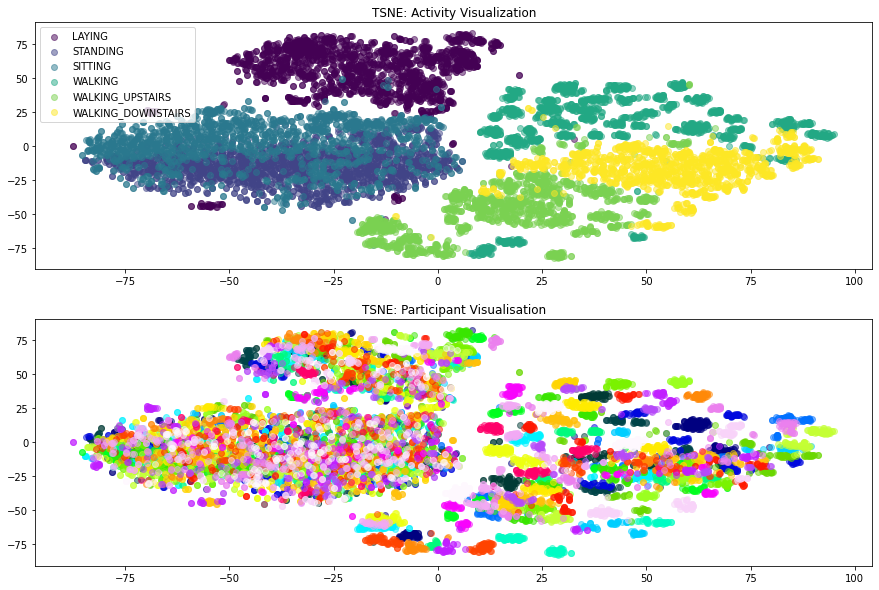

In [9]:
#Create subplots
fig, axarr = plt.subplots(2, 1, figsize = (15,10))

# Plotting the activities 
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity 
for i, group in enumerate(label_counts.index):
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y = tsne_transformed[mask][:,1], c = colors[i], alpha = 0.5, label = group)
axarr[0].set_title('TSNE: Activity Visualization')
axarr[0].legend()

### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
plt.savefig('tsne.png')
plt.show()

## What do the plots tell us?
Plot 1 shows that most activities are separable \
Plot 2 reveals that everybody has a unique walking style and thus the smartphone should be able to detect what we are doing and who is using the smartphone

# Using Random Forest Classifier to classify activities 

## LabelEncoder
We use this to encode target labels with value between 0 and n_classes-1. In our case it was used to transform non-numerical labels (activities were labelled as WALKING, LYING, WALKING UP, WALKING DOWN, etc.) to numerical labels. An example of this is, 
```python
>>> le = preprocessing.LabelEncoder()
>>> le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
>>> list(le.classes_)
['amsterdam', 'paris', 'tokyo']
>>> le.transform(["tokyo", "tokyo", "paris"])
array([2, 2, 1]...)
>>> list(le.inverse_transform([2, 2, 1]))
['tokyo', 'tokyo', 'paris']
```

In [10]:
enc = LabelEncoder()
label_encoded = enc.fit_transform(label)
X_train, X_test, y_train, y_test = train_test_split(rf_data, label_encoded, test_size = 0.2, random_state = 3)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier().fit(X_train, y_train)

pred_clf = clf.predict(X_test)

acc_score = accuracy_score(y_test, pred_clf)*100

print('Random Forest accuracy: \n{}%'.format(acc_score))
print('\n')
print('Classification Report:\n{}'.format(classification_report(y_test, pred_clf)))

Random Forest accuracy: 
93.64077669902913%


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       407
           1       0.90      0.81      0.85       353
           2       0.86      0.92      0.89       371
           3       0.97      0.97      0.97       351
           4       0.96      0.96      0.96       272
           5       0.96      0.95      0.96       306

    accuracy                           0.94      2060
   macro avg       0.94      0.94      0.94      2060
weighted avg       0.94      0.94      0.94      2060



In [12]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

## Plotting our confusion matrix 
0 - Laying
1 - Sitting
2 - Standing
3 - Walking
4 - Walking Downstairs
5 - Walking Upstairs

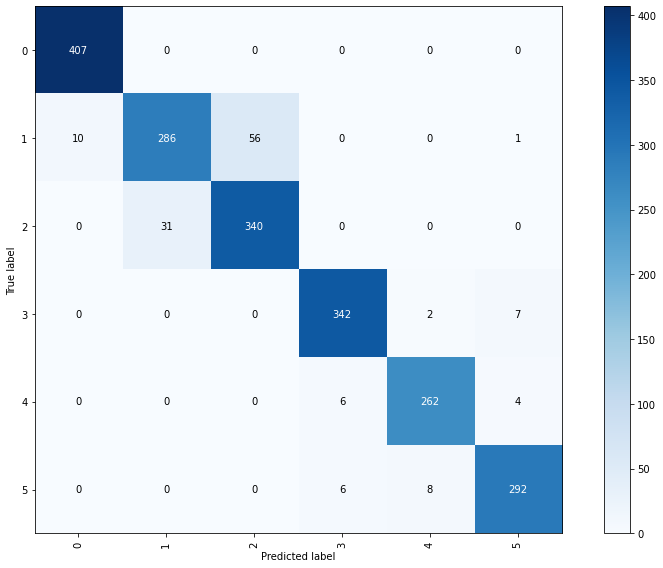

In [13]:
cm = confusion_matrix(y_test, pred_clf)
plot_confusion_matrix(cm, np.unique(pred_clf))

## According to the 2nd plot, it seems that the separability of the participants vary regarding their activity. 
Let us investigate this by fitting the same basic model to the data of each activity separately.

In [14]:
data = []

# Iterating over each activity

for activity in label_counts.index:
    act_data = both_df[label==activity].copy()
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
    # Scaling the data
    scl = StandardScaler()
    act_data = scl.fit_transform(act_data)
    
    # Reducing the dimensions using PCA
    pca = PCA(n_components = 0.9, random_state = 3)
    act_data = pca.fit_transform(act_data)
    
    # Splitting training and test data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train, X_test, y_train, y_test = train_test_split(act_data, label_encoded, random_state=3)
    
    # Fitting the model
    print('Activity: {}'.format(activity))
    clf = RandomForestClassifier().fit(X_train, y_train)
    pred_clf = clf.predict(X_test)
    
    score = accuracy_score(y_true=y_test, y_pred = clf.predict(X_test))
    print('Accuracy on testset:\t{:.4f}\n'.format(score))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	0.6667

Activity: STANDING
Accuracy on testset:	0.5514

Activity: SITTING
Accuracy on testset:	0.4966

Activity: WALKING
Accuracy on testset:	0.9907

Activity: WALKING_UPSTAIRS
Accuracy on testset:	0.9637

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	0.9489



## Analysis:
Detecting the participant regarding their current activity has varying accuracy but it seems to be highest when its walking. This implies that there is a distinguishable factor amongst each participants (may be their walking style).

## Determining the time the smartphone would gather data for that level of accuracy

From the information given on the website, it stated that there was a fixed-width sliding windows of 2.56 sec and 50% overlap for each datapoint. We can determine that a single datapoint is gathered at around every 1.28 sec.

In [15]:
time_df = (both_df.groupby([label, subject_data])['Data'].count().reset_index().groupby('Activity').agg({'Data':'mean'}) * 1.28).rename(columns={'Data':'Seconds'})
activity_df = pd.DataFrame(data, columns=['Activity', 'Accuracy']).set_index('Activity')
activity_df.join(time_df)

,Accuracy,Seconds
Activity,,
LAYING,0.666667,82.944000
STANDING,0.551363,81.322667
SITTING,0.496629,75.818667
WALKING,0.990719,73.472000
WALKING_UPSTAIRS,0.963731,65.877333
WALKING_DOWNSTAIRS,0.948864,59.989333


#### We can gather that it takes around 1 to 1.5 min to gather the data accurately

## Feature importance (Walking)

In [16]:
# Create dataset
w_tsne_data = both_df[label=='WALKING'].copy()
w_data_data = w_tsne_data.pop('Data')
w_subject_data = w_tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
w_tsne_data = scl.fit_transform(w_tsne_data)

# Split training testing data
enc = LabelEncoder()
w_label_encoded = enc.fit_transform(w_subject_data)
X_train, X_test, y_train, y_test = train_test_split(w_tsne_data, w_label_encoded, random_state=3)

In [17]:
# Create model
w_fi_clf = RandomForestClassifier()
w_fi_clf = w_fi_clf.fit(X_train, y_train)

# Getting the importances
w_features = both_df.drop(['Data', 'subject'], axis=1).columns
w_importances = w_fi_clf.feature_importances_

In [18]:
# Summing the importances

w_data = {'Gyroscope': 0, 'Accelerometer':0}
for w_importances, w_feature in zip(w_importances, w_features):
    if 'Gyro' in w_feature:
        w_data['Gyroscope'] += w_importances
    if 'Acc' in w_feature:
        w_data['Accelerometer'] += w_importances

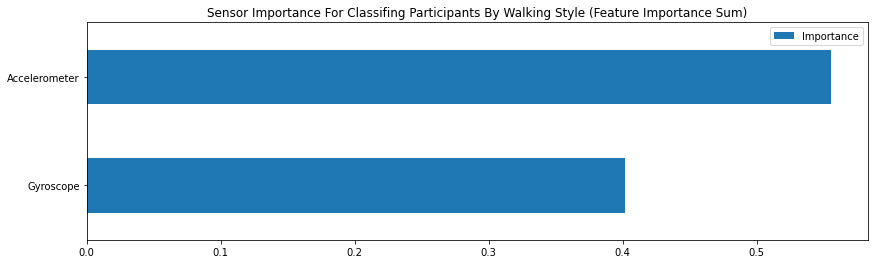

In [19]:
# Create dataframe and plot
walking_sensor_df = pd.DataFrame.from_dict(w_data, orient='index').rename(columns={0:'Importance'})
walking_sensor_df.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By Walking Style (Feature Importance Sum)')
plt.savefig('featureimportance_walking.png')
plt.show()

## Feature Importance by Sensor (Walking Upstairs)

In [20]:
# Create dataset (laying)
wup_tsne_data = both_df[label=='WALKING_UPSTAIRS'].copy()
wup_data_data = wup_tsne_data.pop('Data')
wup_subject_data = wup_tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
wup_tsne_data = scl.fit_transform(wup_tsne_data)

# Split training testing data
enc = LabelEncoder()
wup_label_encoded = enc.fit_transform(wup_subject_data)
X_train, X_test, y_train, y_test = train_test_split(wup_tsne_data, wup_label_encoded, random_state=3)

In [21]:
# Create model
wup_fi_clf = RandomForestClassifier()
wup_fi_clf = wup_fi_clf.fit(X_train, y_train)

# Getting the importances
wup_features = both_df.drop(['Data', 'subject'], axis=1).columns
wup_importances = wup_fi_clf.feature_importances_

In [22]:
# Summing the importances

wup_data = {'Gyroscope': 0, 'Accelerometer':0}
for wup_importances, wup_feature in zip(wup_importances, wup_features):
    if 'Gyro' in wup_feature:
        wup_data['Gyroscope'] += wup_importances
    if 'Acc' in wup_feature:
        wup_data['Accelerometer'] += wup_importances

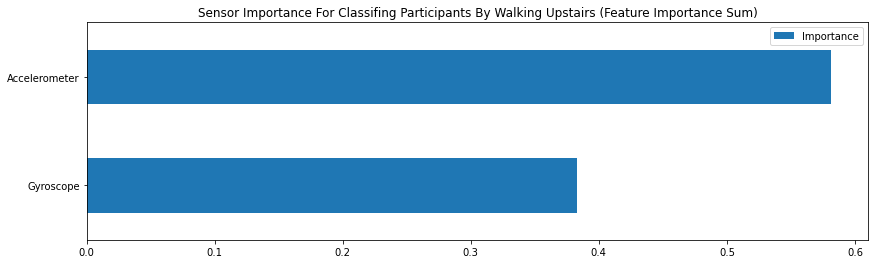

In [23]:
# Create dataframe and plot
walkingup_sensor_df = pd.DataFrame.from_dict(wup_data, orient='index').rename(columns={0:'Importance'})
walkingup_sensor_df.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By Walking Upstairs (Feature Importance Sum)')
plt.savefig('featureimportance_wu.png')
plt.show()

## Feature importance (Walking Downstairs)

In [24]:
# Create dataset (laying)
wdwn_tsne_data = both_df[label=='WALKING_DOWNSTAIRS'].copy()
wdwn_data_data = wdwn_tsne_data.pop('Data')
wdwn_subject_data = wdwn_tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
wdwn_tsne_data = scl.fit_transform(wdwn_tsne_data)

# Split training testing data
enc = LabelEncoder()
wdwn_label_encoded = enc.fit_transform(wdwn_subject_data)
X_train, X_test, y_train, y_test = train_test_split(wdwn_tsne_data, wdwn_label_encoded, random_state=3)

In [25]:
# Create model
wdwn_fi_clf = RandomForestClassifier()
wdwn_fi_clf = wdwn_fi_clf.fit(X_train, y_train)

# Getting the importances
wdwn_features = both_df.drop(['Data', 'subject'], axis=1).columns
wdwn_importances = wdwn_fi_clf.feature_importances_

In [26]:
# Summing the importances

wdwn_data = {'Gyroscope': 0, 'Accelerometer':0}
for wdwn_importances, wdwn_feature in zip(wdwn_importances, wdwn_features):
    if 'Gyro' in wdwn_feature:
        wdwn_data['Gyroscope'] += wdwn_importances
    if 'Acc' in wdwn_feature:
        wdwn_data['Accelerometer'] += wdwn_importances

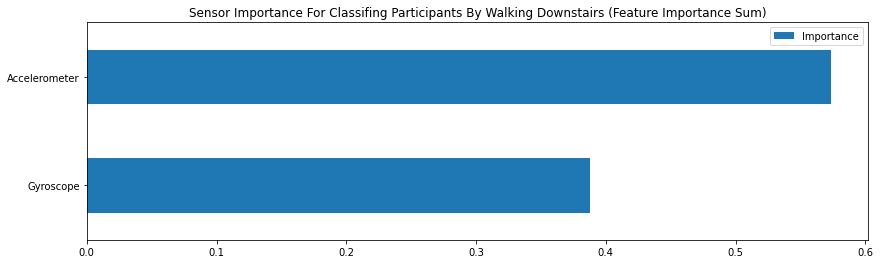

In [27]:
# Create dataframe and plot
wdwn_sensor_df = pd.DataFrame.from_dict(wdwn_data, orient='index').rename(columns={0:'Importance'})
wdwn_sensor_df.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By Walking Downstairs (Feature Importance Sum)')
plt.savefig('featureimportance_wd.png')
plt.show()

#### We can see that the accelerometer provides more information, but the gyroscope still provides sufficient information that would be helpful for classification

## Walking Duration Comparison among Participants
To check if the range of data among participants are more or less the same.

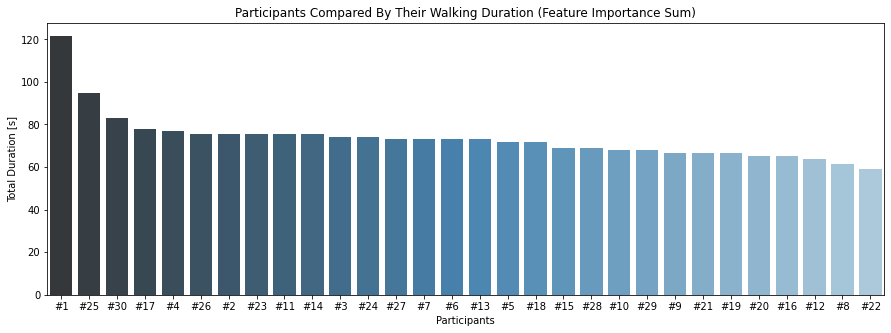

In [28]:
# Group the data by participant and compute total duration of walking
mask = label=='WALKING'
duration_df = (both_df[mask].groupby('subject')['Data'].count() * 1.28)

# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data', palette="Blues_d")
plt.title('Participants Compared By Their Walking Duration (Feature Importance Sum)')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.savefig('walking_duration.png')
plt.show()

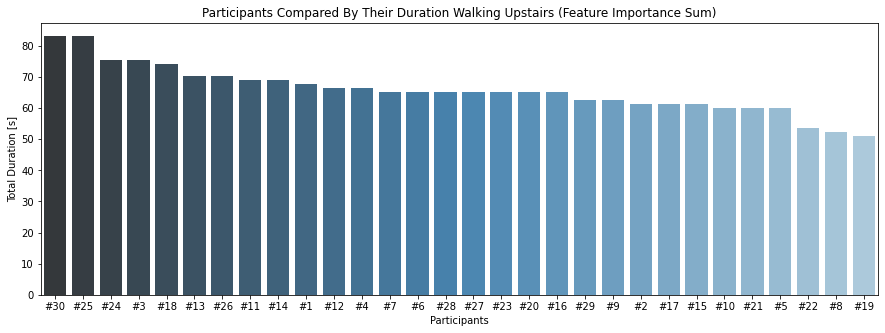

In [29]:
# Group the data by participant and compute total duration of standing
mask = label=='WALKING_UPSTAIRS'
duration_df = (both_df[mask].groupby('subject')['Data'].count() * 1.28)

# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data', palette="Blues_d")
plt.title('Participants Compared By Their Duration Walking Upstairs (Feature Importance Sum)')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.savefig('walkingup_duration.png')
plt.show()

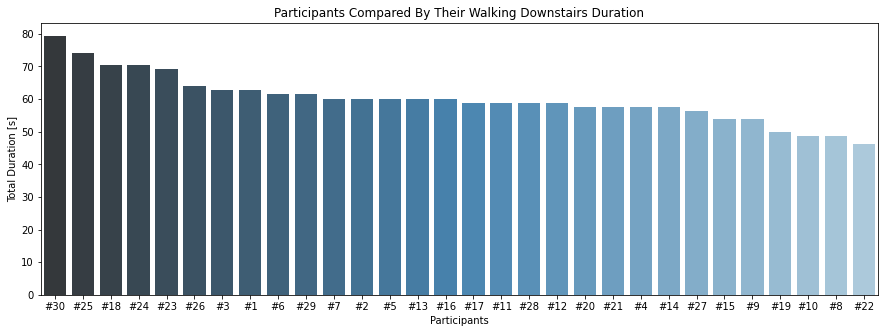

In [30]:
# Group the data by participant and compute total duration of standing
mask = label=='WALKING_DOWNSTAIRS'
duration_df = (both_df[mask].groupby('subject')['Data'].count() * 1.28)

# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data',palette="Blues_d")
plt.title('Participants Compared By Their Walking Downstairs Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.savefig('walkingdown_duration.png')
plt.show()